In [68]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: set() for i in range(1, num_vertices + 1)}

    def add_edge(self, u, v):
        self.adj_list[u].add(v)
        self.adj_list[v].add(u)

    def get_neighbors(self, vertex):
        return self.adj_list[vertex]

    def get_all_vertices(self):
        return self.adj_list.keys()

def parse_graph_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    header = lines[0].strip().split()
    num_vertices = int(header[2])

    graph = Graph(num_vertices)

    for line in lines[1:]:
        u, v = map(int, line.strip().split())
        graph.add_edge(u, v)

    return graph

def find_non_neighbors(graph, marked_vertices):
    marked_set = set(marked_vertices)
    excluded_vertices = set()

    # Include neighbors of marked vertices in the exclusion set
    for vertex in marked_vertices:
        excluded_vertices.add(vertex)
        excluded_vertices.update(graph.get_neighbors(vertex))

    # Collect vertices that are neither marked nor in the neighborhood of a marked vertex
    result = [v for v in graph.get_all_vertices() if v not in excluded_vertices]

    return result

def visualize_graph(graph, marked_vertices, focus_vertices=None):
    G = nx.Graph()

    for vertex in graph.get_all_vertices():
        G.add_node(vertex)

    for vertex, neighbors in graph.adj_list.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)

    if focus_vertices is not None:
        focus_set = set(focus_vertices)
        focus_neighbors = set()
        for vertex in focus_vertices:
            focus_neighbors.update(graph.get_neighbors(vertex))
        focus_vertices_to_include = focus_set.union(focus_neighbors)

        # Filter the graph to include only the focused vertices and their neighbors
        G = G.subgraph(focus_vertices_to_include)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))

    # Get vertices that are not marked or in the neighborhood of marked vertices
    non_neighbors = find_non_neighbors(graph, marked_vertices)

    node_colors = []
    for v in G.nodes():
        if v in marked_vertices:
            node_colors.append("red")  # Marked vertices
        elif v in non_neighbors:
            node_colors.append("green")  # Non-neighbor vertices
        else:
            node_colors.append("blue")  # Remaining vertices

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=700,
        font_size=12
    )
    plt.show()

In [69]:
def parse_highs(file_path):
    x_indices = []  # List to store indices of x variables with value 1

    with open(file_path, 'r') as file:
        for line in file:
            # Only process lines starting with 'x'
            if line.startswith('x'):
                parts = line.split()
                if len(parts) == 2 and parts[1] == '1':
                    # Extract the number after 'x' and add to the list
                    x_indices.append(int(parts[0][1:])+1)

    return x_indices

Vertices not marked or in the neighborhood of a marked vertex: [4, 9, 17, 18, 25, 27, 28, 29, 32, 36, 37, 42, 43, 47, 56, 61]


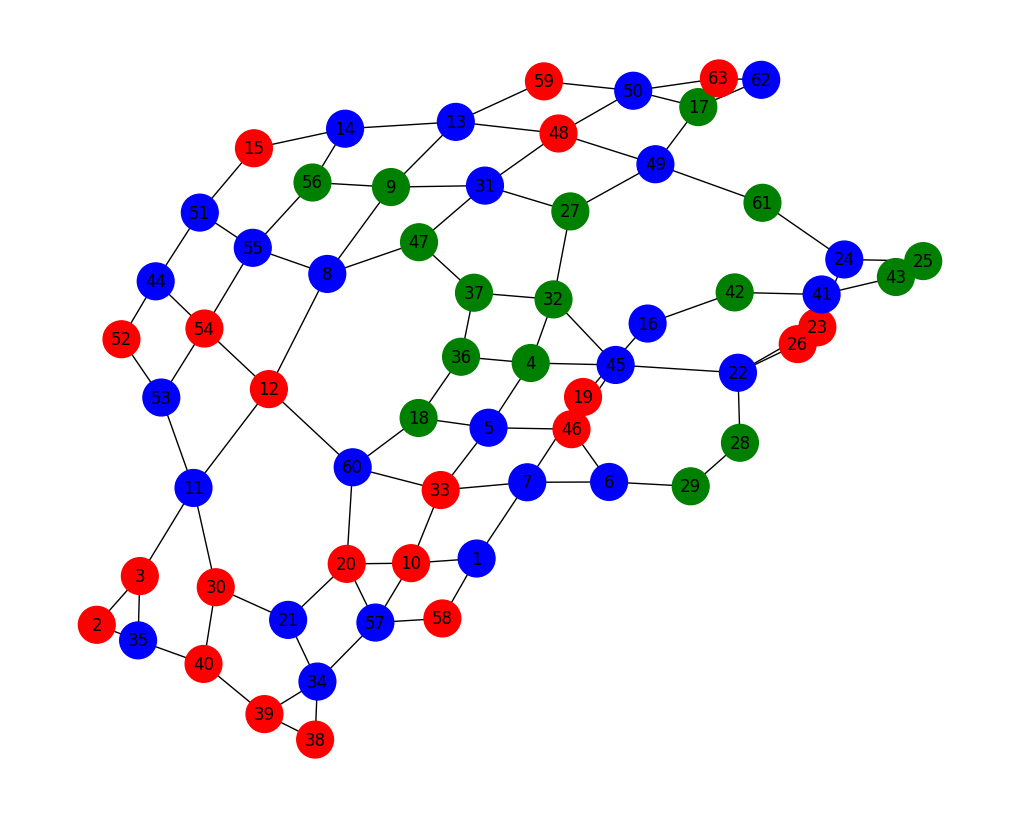

In [70]:
file_path = "/home/malid/DominatingSets/graphs/testset/bremen_subgraph_50.gr"

# Parse the graph

graph = parse_graph_file(file_path)

# Find vertices that are not marked or in the neighborhood of a marked vertex
all_vertices = list(range(1, 64))
defined_vertices = [1,4,5,6,7,8,9,11,13,14,16,17,18,21,22,24,25,27,28,29,31,32,34,35,36,37,41,42,43,44,45,47,49,50,51,53,55,56,57,60,61,62]
diff = list(set(all_vertices) - set(defined_vertices))

marked_vertices = diff
result = find_non_neighbors(graph, marked_vertices)

print("Vertices not marked or in the neighborhood of a marked vertex:", result)

# Visualize the graph
visualize_graph(graph, marked_vertices, focus_vertices=None)